# 3.2_Numpy for Randomness and Calculus

## *3.2a Sampling*

In [1]:
#NumPy subpackage for random variables

import numpy as np
from numpy import random as rnd 

In [2]:
min_value = -1
max_value = 1

# number_of_samples = 1 << 7 #bit shifting is not important for exam
# merk dir lieber
number_of_samples = 1* 2**7

print(f"Number of samples: {number_of_samples}")
U = rnd.uniform(min_value, max_value, size=number_of_samples) # uniform samples in range (min_value, max_value)

f"Mean (approx. Expected value): {U.mean():.3f} Variance: {U.var():.2f} Std: {U.std():.2f}"

Number of samples: 128


'Mean (approx. Expected value): -0.013 Variance: 0.32 Std: 0.57'

## *3.2b Visualize 1-dim samples*

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def vis_1d_samples(X, title=''):

    ax = plt.figure(figsize=(20, 4)).gca()
    ax.set_title(title, fontsize=25)

    ax.plot(X, np.zeros_like(X), '|', c='g', ms=30, label='sample')
    ax.set_xlabel("sample range", fontsize=15)

    ax.axhline(y = 0, color='k')
    ax.axvline(X.mean(), label='samples mean', color='r', linestyle='--')
    ax.grid(axis='x')

    ax.legend(fontsize=20)
    ax.set_yticks([])

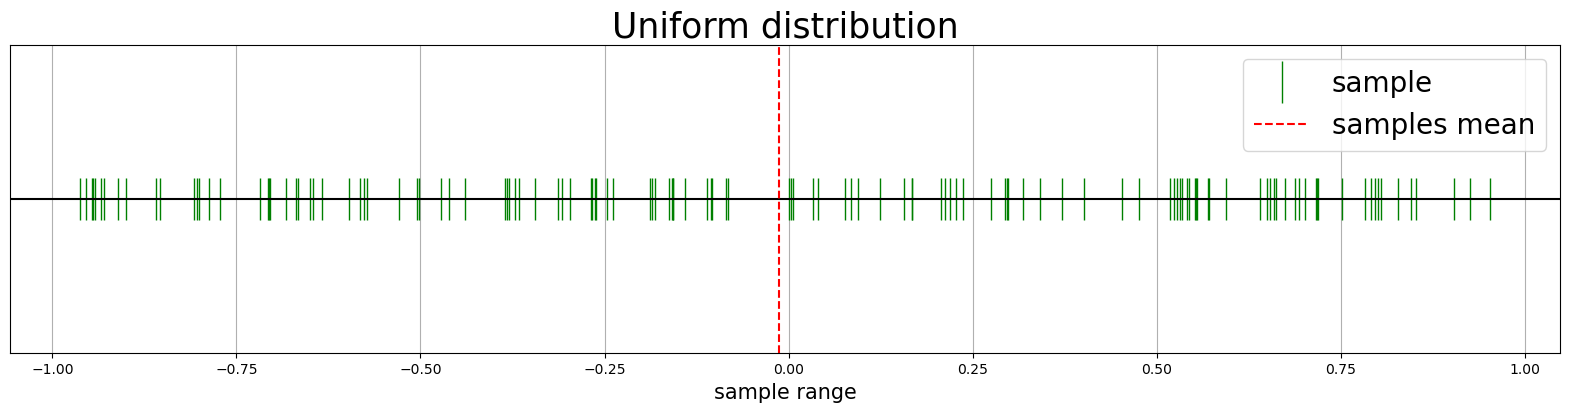

In [4]:
vis_1d_samples(U, title='Uniform distribution')

## *3.2c Represent samples using a bar plot*

In [5]:
counts, ranges = np.histogram(U, bins = 5)
print(counts, ranges)

begins = ranges[:-1]
ends = ranges[1:]
begins, ends

[28 23 25 26 26] [-0.9619164  -0.57907273 -0.19622906  0.18661461  0.56945828  0.95230195]


(array([-0.9619164 , -0.57907273, -0.19622906,  0.18661461,  0.56945828]),
 array([-0.57907273, -0.19622906,  0.18661461,  0.56945828,  0.95230195]))

[-0.77049457 -0.3876509  -0.00480723  0.37803644  0.76088011]
[-0.77  -0.388 -0.005  0.378  0.761]


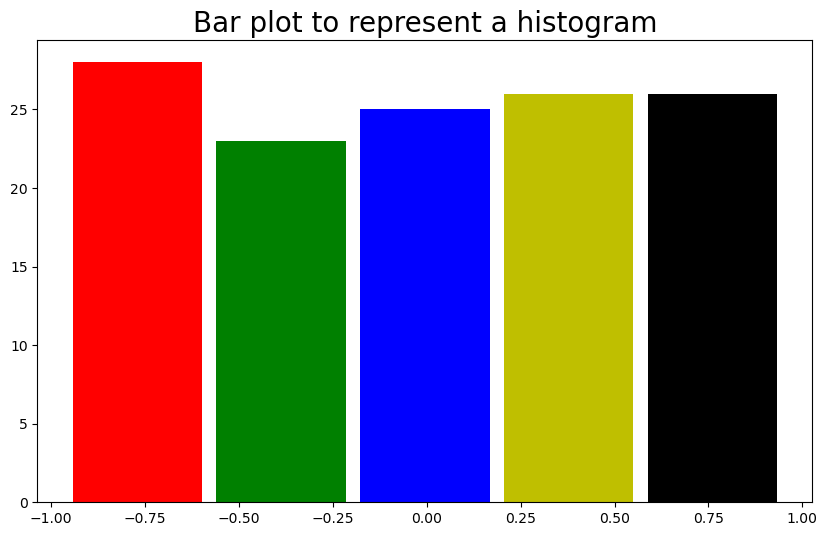

In [6]:
bar_widths = ends - begins
width = np.max(bar_widths)
centers = begins + 0.5 * bar_widths

print(centers)
np.set_printoptions(precision=3, suppress=True)
print(centers)

ax = plt.figure(figsize=(10, 6)).gca()
ax.set_title('Bar plot to represent a histogram', fontsize=20)

rwidth = 0.9
plt.bar(centers, counts, width=rwidth*width, color=['r', 'g', 'b', 'y', 'k']);

In [7]:
reset_printoptions = lambda : np.set_printoptions(edgeitems=3, infstr='inf', linewidth=75, nanstr='nan', precision=8,
suppress=False, threshold=1000, formatter=None)

reset_printoptions()

## *3.2d Represent samples using a histogram plot*

(array([1.10195109, 0.24487802, 0.61219505, 0.12243901, 0.97951208,
        0.36731703, 0.36731703, 0.48975604, 0.12243901, 0.73463406,
        0.85707307, 0.24487802, 0.97951208, 0.61219505, 0.        ,
        0.61219505, 0.36731703, 0.48975604, 0.61219505, 0.48975604,
        0.36731703, 0.12243901, 0.24487802, 1.34682911, 0.24487802,
        0.97951208, 0.61219505, 0.61219505, 0.36731703, 0.36731703]),
 array([-0.9619164 , -0.89810912, -0.83430185, -0.77049457, -0.70668729,
        -0.64288001, -0.57907273, -0.51526545, -0.45145818, -0.3876509 ,
        -0.32384362, -0.26003634, -0.19622906, -0.13242178, -0.06861451,
        -0.00480723,  0.05900005,  0.12280733,  0.18661461,  0.25042189,
         0.31422916,  0.37803644,  0.44184372,  0.505651  ,  0.56945828,
         0.63326556,  0.69707283,  0.76088011,  0.82468739,  0.88849467,
         0.95230195]))

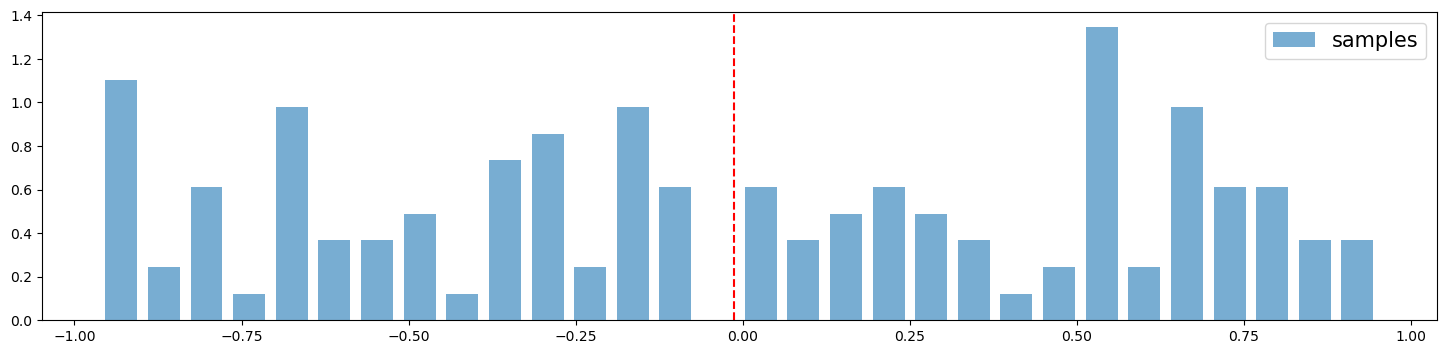

In [8]:
plt.figure(figsize=(18, 4))

# num of bins, block width percentage
nums, ranges, _ = plt.hist(U, bins=30, rwidth=3/4, alpha=0.6, label='samples', density=True) 

plt.axvline(x=U.mean(), ls='--', c='r') # plot dashed mean line
plt.legend(fontsize=15);

nums, ranges

In [9]:
def calc_area(nums, ranges):
    vals = ranges[1:] - ranges[:-1]
    area = np.sum(vals * nums)
    return area

calc_area(nums, ranges) # let the integral be numerically close to 1

1.0

## *3.2e Univariate-normal (Gaussian) distribution*

In [10]:
def sample_normal(mean, std, n_samples=1000, seed=None):
    
    if seed is not None:
        # fixes the random number generator to a seed for debuging
        rnd.seed(seed)
        
    X = rnd.normal(loc=mean, scale=std, size=n_samples)
    print(f'Mean: {X.mean():.3f} Variance: {X.var():.2f} Std: {X.std():.2f}')
    
    return X

In [11]:
mean = 2
std = 8

X = sample_normal(mean, std, seed=42)

Mean: 2.155 Variance: 61.31 Std: 7.83


## *3.2f Gaussian distribution plot*

Mean: 2.006 Variance: 60.73 Std: 7.79


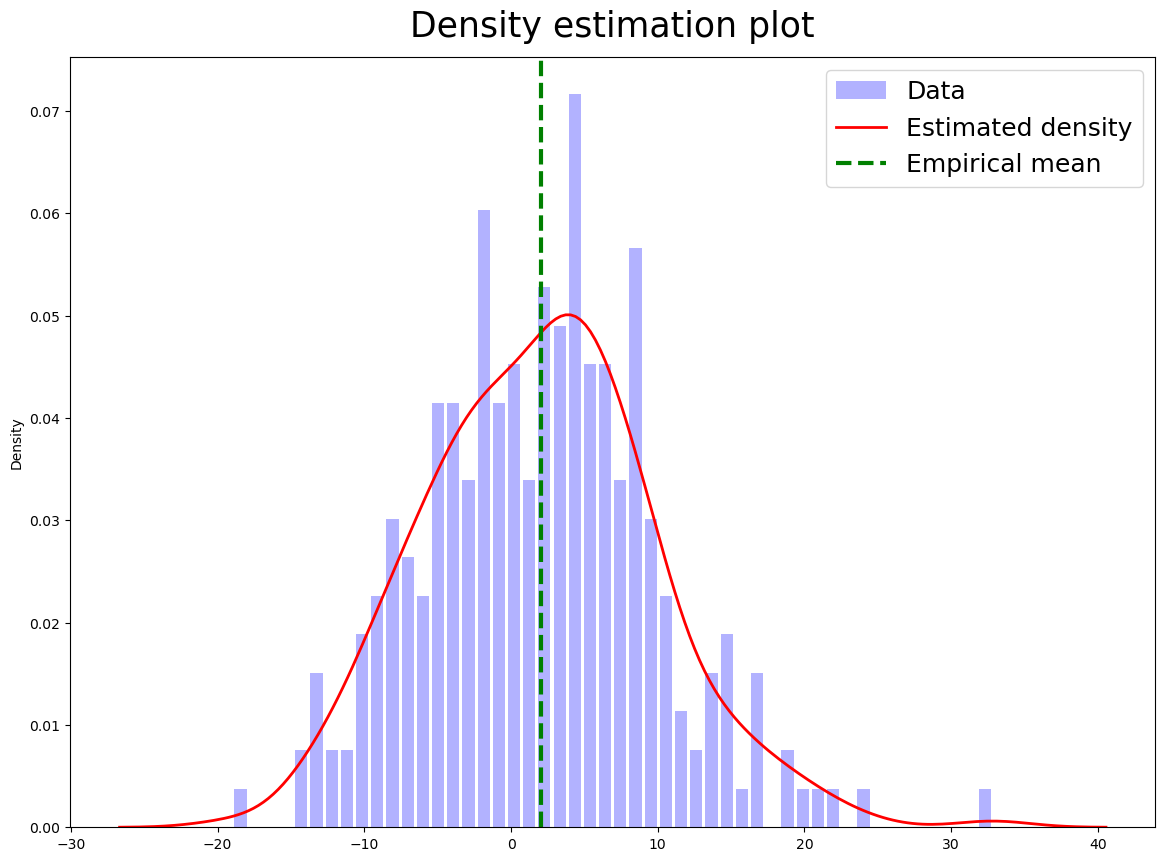

In [12]:
X = sample_normal(mean, std, n_samples=256, seed=42)

ax = plt.figure(figsize=(14, 10)).gca()

nums, borders, _ = ax.hist(X, bins=50, density=True, alpha=0.3, rwidth=0.8, color='b', label='Data')
assert np.isclose(calc_area(nums, borders), 1) # because of the density=True

#conda install -c anaconda seaborn
from seaborn import kdeplot

kdeplot(X, linewidth=2, color='r', label='Estimated density')
ax.axvline(X.mean(), ls='--', c='g', label='Empirical mean', linewidth=3)

ax.set_title('Density estimation plot', fontsize=25, pad=15) # Title's vertical padding 15px
ax.legend(loc='best', fontsize=18);


## *3.2g Mixture of Gussian distributions*

C:\Users\nguye\AppData\Local\Temp\ipykernel_11140\230704775.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_rainbow')


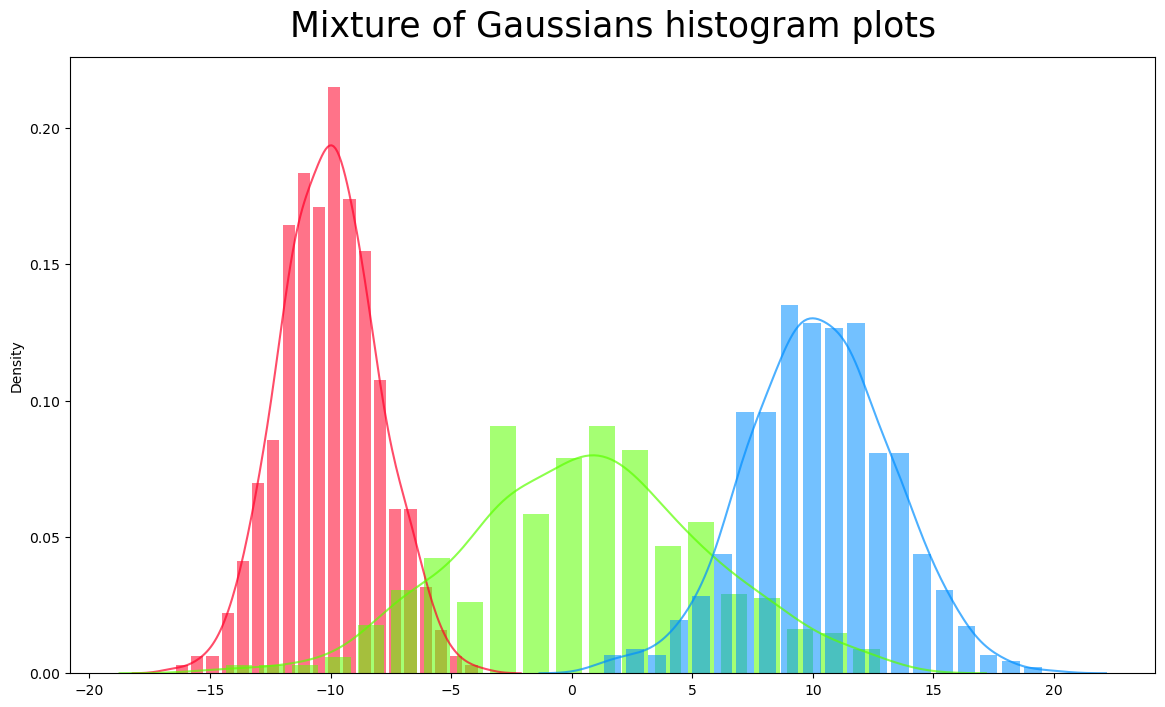

In [13]:
means = [-10, 0, 10]
stds = [2, 5, 3]

assert len(means) == len(stds)

n_clusters = len(means)

ax = plt.figure(figsize=(14, 8)).gca()

from matplotlib import cm
cmap = cm.get_cmap('gist_rainbow')
rgba_values = cmap(np.arange(n_clusters) / n_clusters) # red, green, blue, alpha

for n in range(n_clusters):
    
    data = rnd.normal(means[n], stds[n], size=500)  
    color = rgba_values[n]
    
    ax.hist(data, bins=20, color=color, alpha=0.55, rwidth=0.8, density=True)
    kdeplot(data, color=color, alpha=0.7)
    
ax.set_title('Mixture of Gaussians histogram plots', fontsize=25, pad=15);   

## *3.2h Gaussian histogram plot with subplots*

In [14]:
def plot_gaussians(means, stds, size=250, bins=25):
    
    N = len(means)
    M = len(stds)
    
    fig, axis = plt.subplots(nrows=N, ncols=M, sharey=True, sharex=True, figsize=(24, 16))

    R,C = axis.shape

    for r in range(R):
        for c in range(C):
            
            ax = axis[r,c]
            
            data = rnd.normal(means[r], stds[c], size=size)
            
            ax.hist(data, bins=bins, rwidth=0.8, density=True, color='g', alpha=0.5, label='data')
            ax.axvline(data.mean(), ls='--', c='r', ymax=.8, label='$\\mu =$'+f'{data.mean():0.2f} std: {data.std():0.2f}')
            
            ax.set_xticks(means) # plt.xticks([...])
            ax.legend(fontsize=15)
            ax.grid(axis='y')
            
            ax.set_title(f'{r}_{c}')     
            kdeplot(data, ax=ax, color='k')
            
    fig.suptitle('Gaussian histogram plots', fontsize=25)

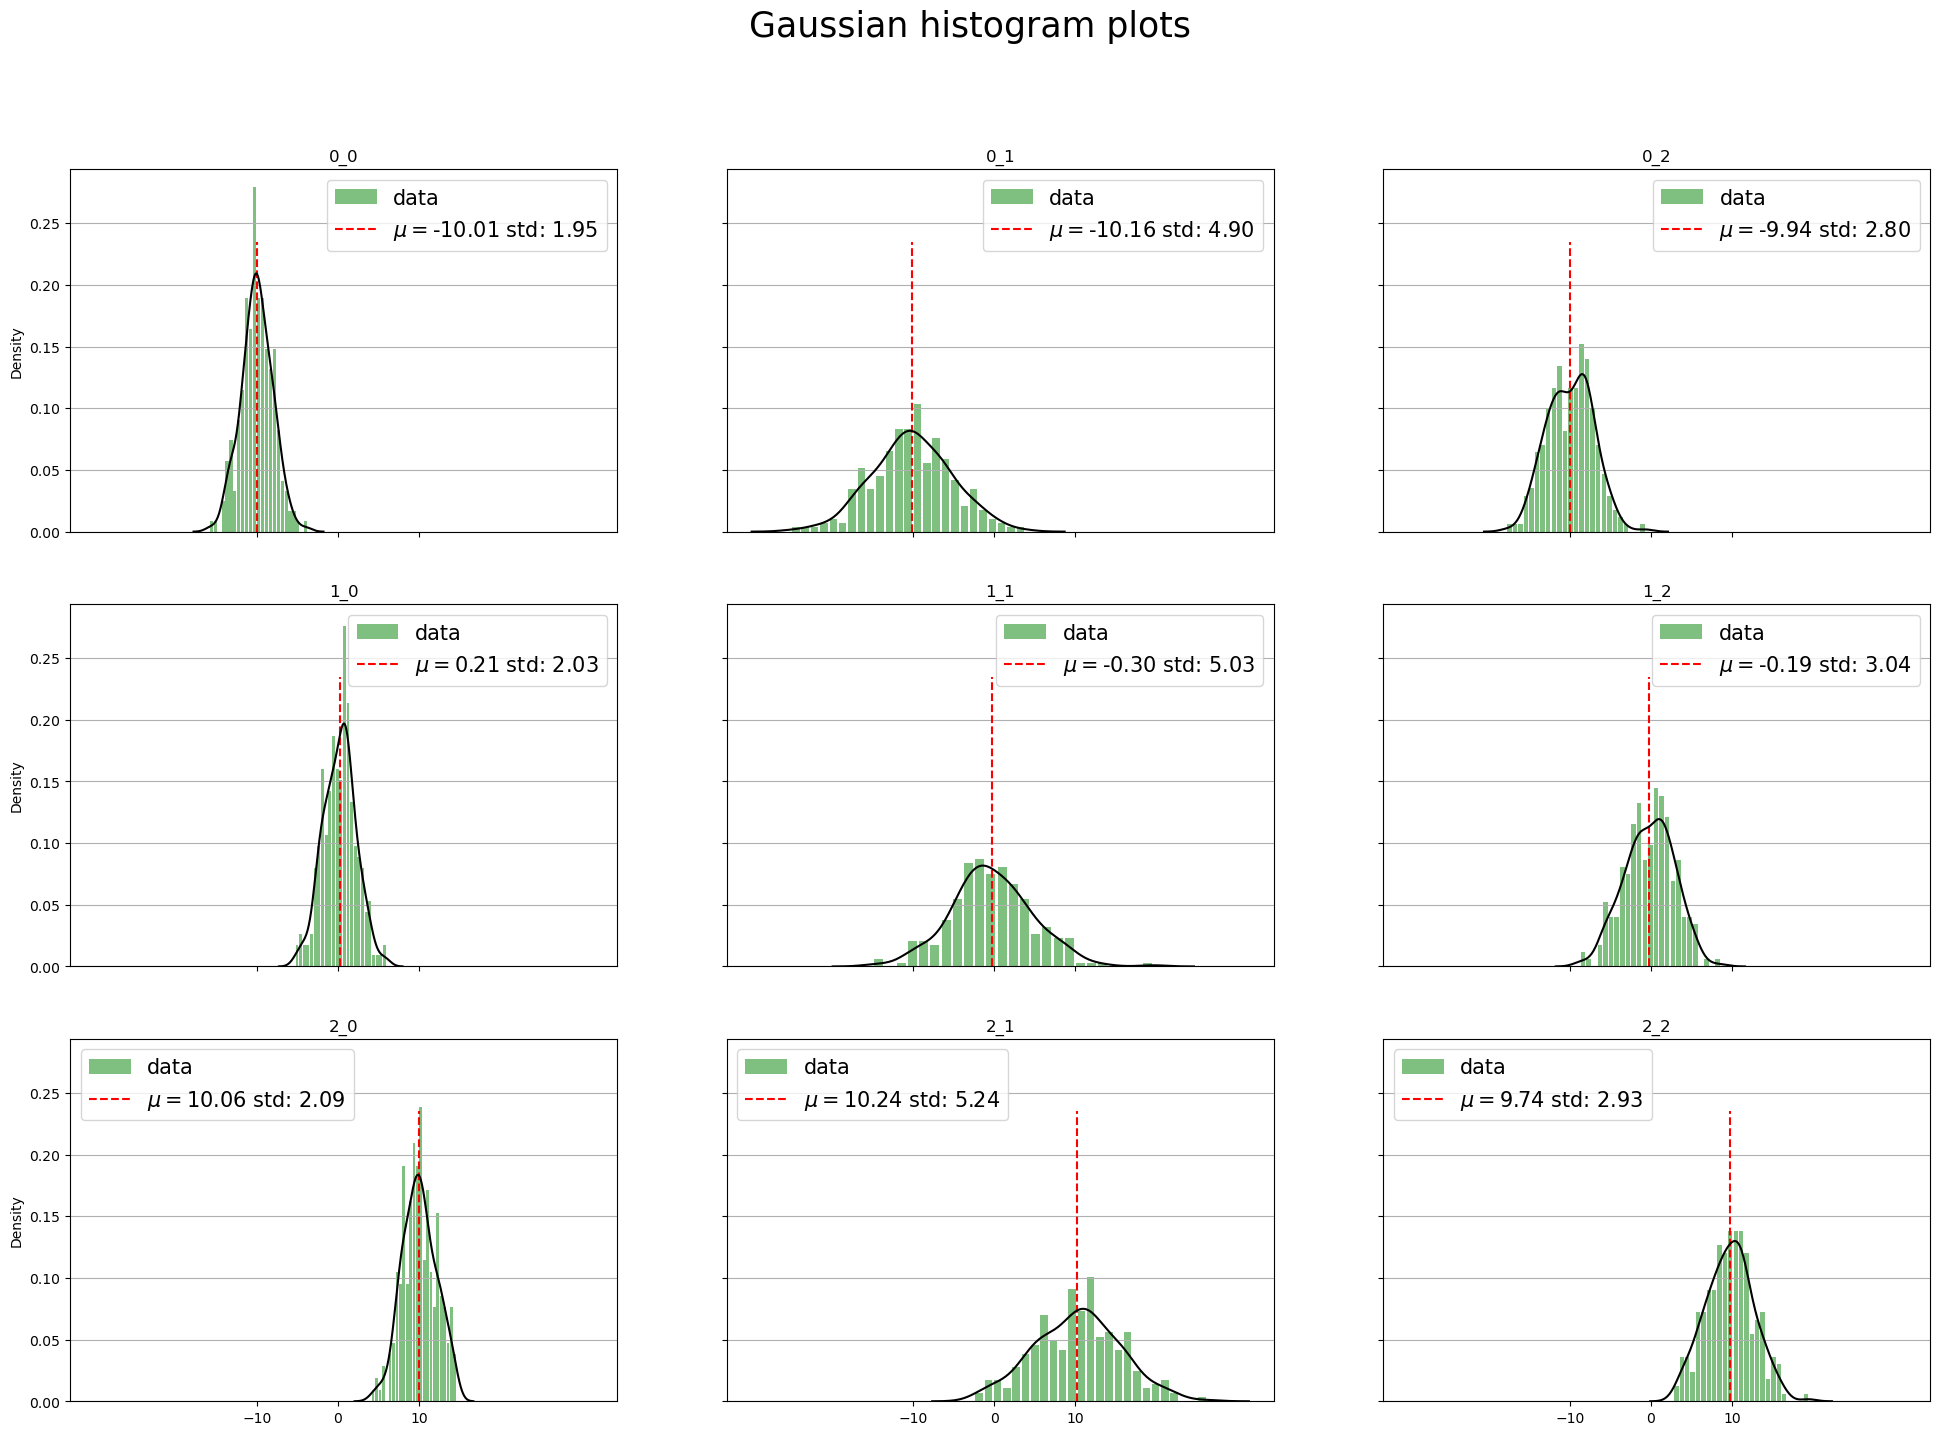

In [15]:
plot_gaussians(means, stds)

## *3.2i Probability density function*

In [16]:
def gauss_pdf(X, mu=0, sigma=1):
    #                                           (N,) - (1,) = (N,d)
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(X - mu)**2/(2*sigma**2))

In [17]:
mean = 2
std = 4

X = np.linspace(start=-15, stop=18, num=100)
print(X[::10])

g_pdf = gauss_pdf(X, mean, std)

[-15.         -11.66666667  -8.33333333  -5.          -1.66666667
   1.66666667   5.           8.33333333  11.66666667  15.        ]


In [18]:
from scipy.stats import norm

n_pdf = norm.pdf(X, loc=mean, scale=std)

assert np.allclose(g_pdf, n_pdf), 'The pdf values are not the same'

## *3.2j Univariate Gaussian PDF*

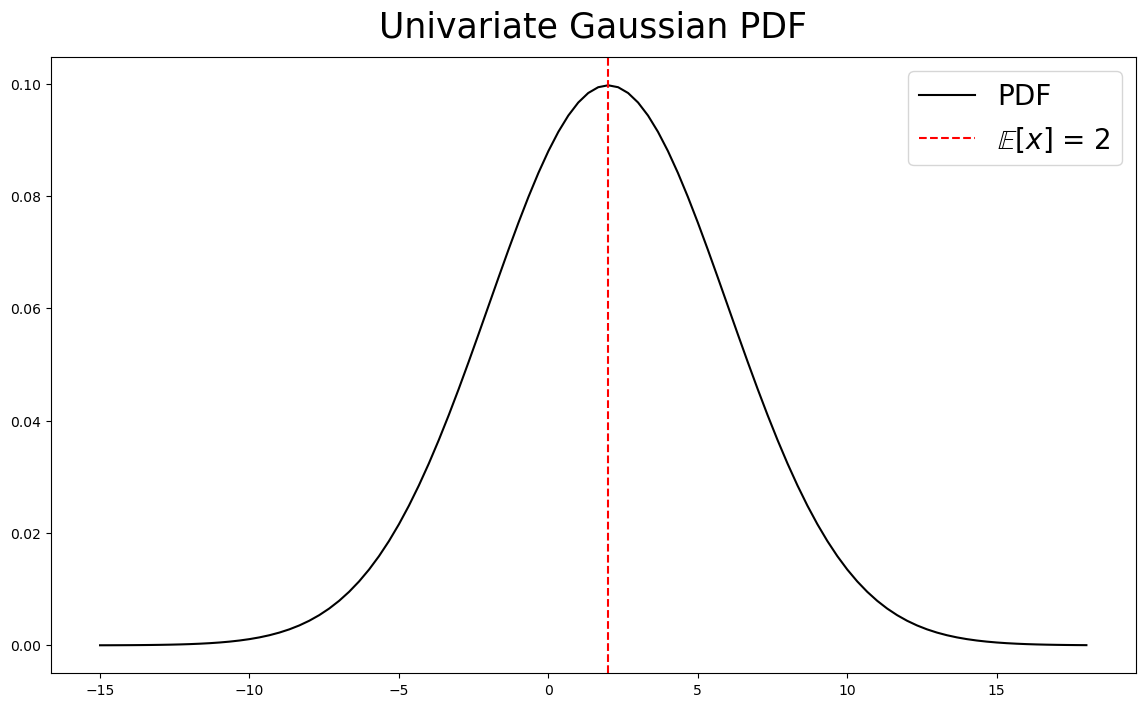

In [19]:
ax = plt.figure(figsize=(14, 8)).gca()
ax.set_title('Univariate Gaussian PDF', fontsize=25, pad=15)

ax.plot(X, g_pdf, color='k', label='PDF')
ax.axvline(mean, color='r', linestyle='--', label='$\mathbb{E}[x]$' + f' = {mean}')
ax.legend(fontsize=20);

## *3.2k Multibariate Gaussian distribution*

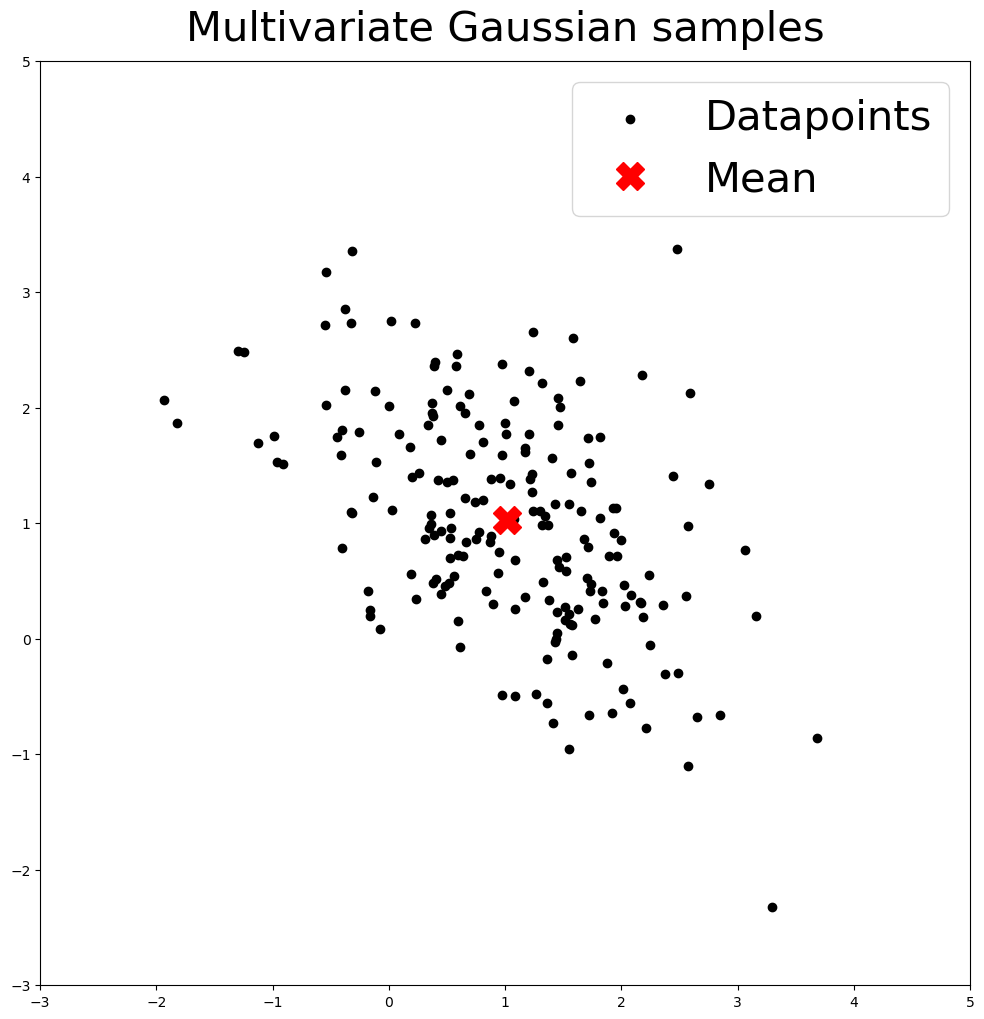

In [20]:
from scipy.stats import multivariate_normal

mu = np.ones(2) # [1, 1]
Sigma =  np.array([[1, -0.5],[-0.5, 1]]) # use np.eye(d) for Identity matrix

xmin, xmax, ymin, ymax = [-3, 5, -3, 5]

X = multivariate_normal.rvs(mean=mu, cov=Sigma, size=200, random_state=42) # get random samples

ax = plt.figure(figsize=(12, 12)).gca()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title('Multivariate Gaussian samples', fontsize=30, pad=15)
ax.scatter(*X.T, color='k', label='Datapoints')
ax.plot(*X.mean(0), 'X', color='r', ms=20, label='Mean')
ax.legend(loc='best', fontsize=30);

## *3.2l Multivariate Gaussian density plot*

(800, 800) (800, 800)
(800, 800, 2)


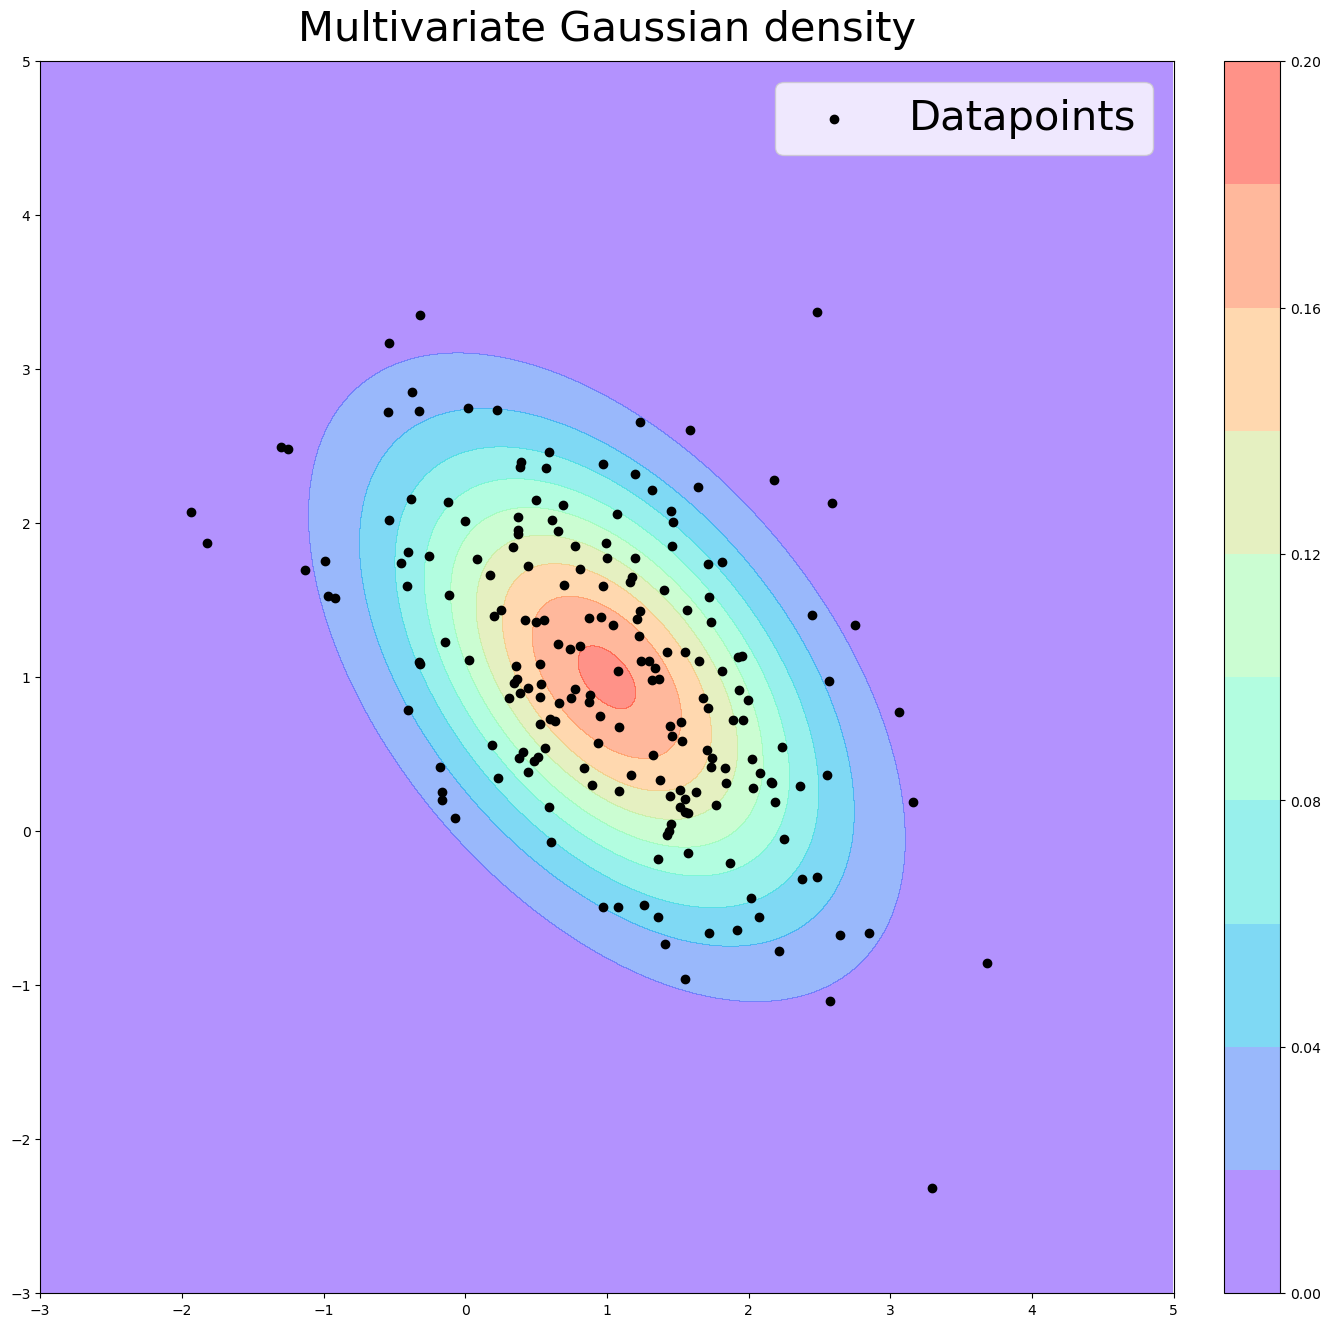

In [21]:
x, y = np.mgrid[xmin:xmax:.01, ymin:ymax:.01]
print(x.shape, y.shape)

xy = np.dstack([x, y]) # Stack arrays in sequence depth wise (along third axis).
#xy = np.r_[x[:, :, None], y[:, :,None]] # equiv

print(xy.shape)

z = multivariate_normal(mu, Sigma).pdf(xy) # calc MVG pdf values

fig = plt.figure(figsize=(16, 16))
ax = fig.gca()

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

cntr = ax.contourf(x, y, z, cmap='rainbow', alpha=0.5, levels=10)

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.5)

fig.colorbar(cntr, cax=cax, orientation='vertical')
ax.set_title('Multivariate Gaussian density', fontsize=30, pad=15)
ax.scatter(*X.T, color='k', label='Datapoints')
ax.legend(loc='best', fontsize=30);

## *3.2m Multinomial distribution*

In [22]:
fruits = np.array([
    'watermelon',
    'apple',
    'grape',
    'grapefruit',
    'lemon',
    'banana',
    'cherry'
])

## *3.2n Sample from multinomial*

In [23]:
n = 5 # number of samples

p = np.ones(len(fruits))/len(fruits) # represents equal sampling probability

print(f"Sampling probabilities: {p}\n")

all_fruits = np.tile(fruits, (n,1)) # repeat multiple (5) times to represent all possible picks
print(f"All fruits basket: \n{all_fruits}" )
print(50 * '--')

Sampling probabilities: [0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]

All fruits basket: 
[['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']
 ['watermelon' 'apple' 'grape' 'grapefruit' 'lemon' 'banana' 'cherry']]
----------------------------------------------------------------------------------------------------


In [24]:
rnd.seed(42)

mlt = rnd.multinomial(1, p , size=(n))
print(f"Sampling outcome: \n{mlt}")

mask = mlt.astype(bool)
print(50 * '--')
print(f"Random selection mask: \n{mask}")

samples = all_fruits[mask]
print(50 * '--')
print(f"Down samples: {samples}")

Sampling outcome: 
[[0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]
----------------------------------------------------------------------------------------------------
Random selection mask: 
[[False  True False False False False False]
 [False False False False False  True False]
 [False False False  True False False False]
 [False False False False False  True False]
 [False False False False False False  True]]
----------------------------------------------------------------------------------------------------
Down samples: ['apple' 'banana' 'grapefruit' 'banana' 'cherry']


In [25]:
'''
rnd.seed(42)

mlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with the given sampling probabilities
print(f"Sampling outcome: \n{mlt}")

mask = mlt.astype(bool)
print(50 * '--')
print(f"Random selection mask: \n{mask}" )

samples = all_fruits[mask] # select drown samples from all fruits
print(50 * '--')
print(f"Drown samples: {samples}")
'''

'\nrnd.seed(42)\n\nmlt = rnd.multinomial(1, p, size=(n)) # draw multinomial samples 5 times with the given sampling probabilities\nprint(f"Sampling outcome: \n{mlt}")\n\nmask = mlt.astype(bool)\nprint(50 * \'--\')\nprint(f"Random selection mask: \n{mask}" )\n\nsamples = all_fruits[mask] # select drown samples from all fruits\nprint(50 * \'--\')\nprint(f"Drown samples: {samples}")\n'

In [26]:
print(f"Empirical estimation of sampling probabilities: {mask.mean(axis=0)}")

Empirical estimation of sampling probabilities: [0.  0.2 0.  0.2 0.  0.4 0.2]


## *3.2o Adjust selection probabilities*

In [27]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05] # new probailities to pick a fruit
assert np.isclose(np.sum(p), 1)

n = 10

all_fruits = np.tile(fruits, (n, 1))

mlt = rnd.multinomial(1, p, size=n) # draw multinomial samples 5 times with given probabilities
print(mlt.shape) # mask as 0 or 1 ints

samples = all_fruits[mlt.astype(bool)] # show drown samples
print(samples)

# Closer estimation because of the higher number of samples e.g. n = 10_000
mlt.mean(axis=0) 

(10, 7)
['cherry' 'apple' 'grape' 'apple' 'apple' 'apple' 'apple' 'apple' 'apple'
 'apple']


array([0. , 0.8, 0.1, 0. , 0. , 0. , 0.1])

## *3.2p Another way to make discrete choices*

In [28]:
p = [0.05, 0.70, 0.05, 0.05, 0.05, 0.05, 0.05]

temp = [0] + p[:-1]
print(temp)

# Cumulate them
l = np.cumsum(temp) # lower-bounds
h = np.cumsum(p)    # upper-bounds

print(f'Lower: {l} and upper: {h} bounds')

# Draw uniformly a number between 0 and 1
u = np.random.uniform(0, 1)

# Find which bin it belongs to
s = np.logical_and(u >= l, u < h)  # *

print(s) # sampled bin as a mask

# get the label
fruits[np.argmax(s)]

[0, 0.05, 0.7, 0.05, 0.05, 0.05, 0.05]
Lower: [0.   0.05 0.75 0.8  0.85 0.9  0.95] and upper: [0.05 0.75 0.8  0.85 0.9  0.95 1.  ] bounds
[False  True False False False False False]


'apple'

## *3.2q Automatic differnation with JAX*

In [29]:
# ...
# jax not important for exam

## *3.2r Plot the optimization steps*

In [30]:
import numpy as np

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_minimize(x, f, max_it=10, step_size=0.01):
    
    plt.figure(figsize=(10, 8))      
    plt.plot(x, f(x), label='$f(x)$')
    
    vals = minimize_(f, x0=x[0], step_size=step_size, max_it=max_it)
    
    plt.plot(vals, f(vals), "o--", c="r", label='opt step')  
    plt.legend(loc='best', fontsize=20)
    plt.grid()

In [32]:
x = np.arange(-5, 5.01, 0.25) # function range
plot_minimize(x, f, max_it=10, step_size=0.1)

NameError: name 'f' is not defined

## *3.2s SciPy minimize function*

C:\Users\nguye\AppData\Local\Temp\ipykernel_11140\376613714.py:2: RuntimeWarning: divide by zero encountered in divide
  f = lambda x, coeff=3, power=2: coeff * np.divide(coeff, x) + x ** power


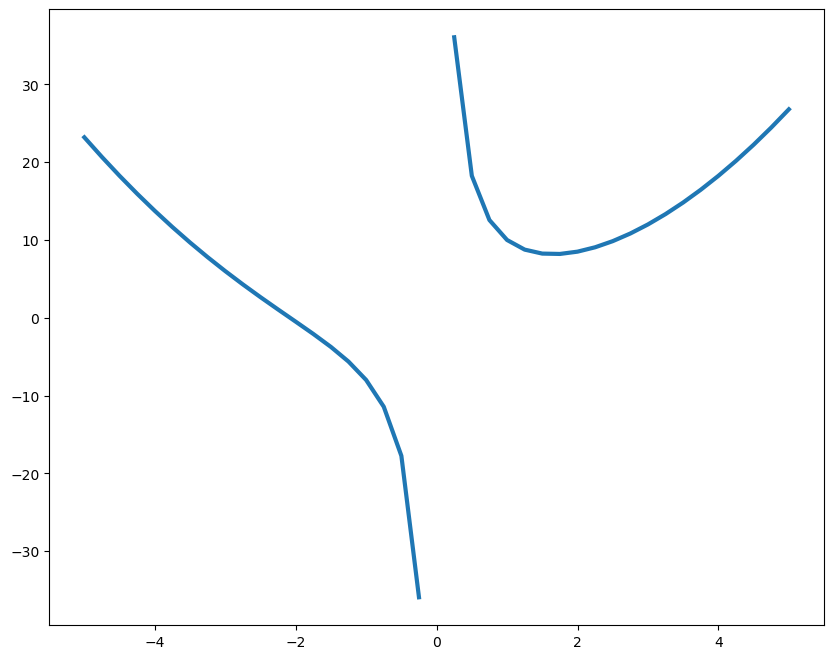

In [33]:
# Non continous function
f = lambda x, coeff=3, power=2: coeff * np.divide(coeff, x) + x ** power

x = np.arange(-5, 5.01, 0.25)
plt.figure(figsize=(10, 8))
plt.plot(x, f(x), linewidth=3)
plt.show()

## *3.2t Optimize non continuous functions*

In [34]:
#conda install -c anaconda scipy

from scipy.optimize import minimize
import numpy as np

# use constrained optimization with bounds
min_x, max_x = (0.01, np.inf)

res = minimize(f, 5, args=(3, 2), method='L-BFGS-B', bounds=((min_x, max_x),) ) 
# result dict object
res

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 8.177042667744633
        x: [ 1.651e+00]
      nit: 9
      jac: [ 3.553e-07]
     nfev: 24
     njev: 12
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

## *3.2u Local minimum*

C:\Users\nguye\AppData\Local\Temp\ipykernel_11140\376613714.py:2: RuntimeWarning: divide by zero encountered in divide
  f = lambda x, coeff=3, power=2: coeff * np.divide(coeff, x) + x ** power


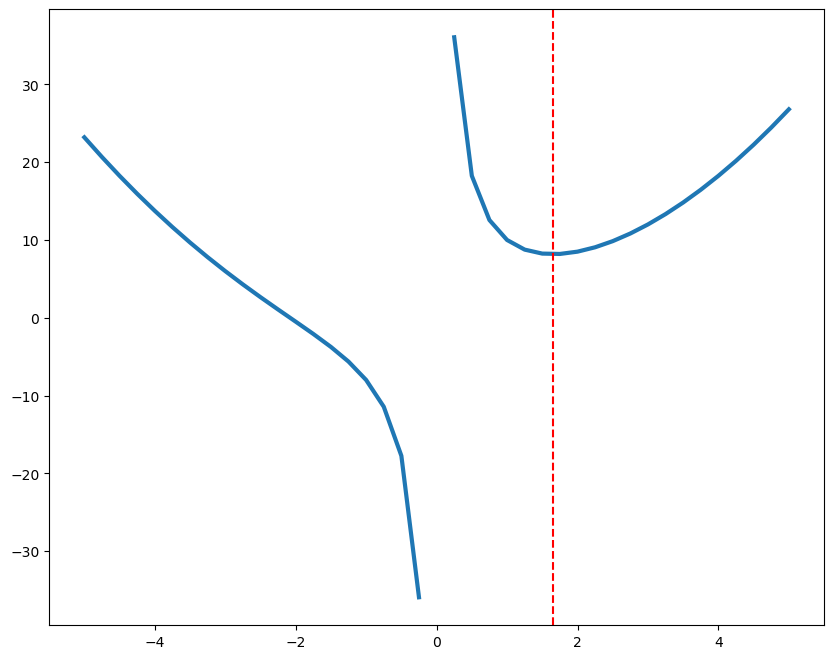

In [35]:
plt.figure(figsize=(10, 8))
plt.plot(x, f(x), linewidth=3)
plt.axvline(res['x'], linestyle='--', c='r')
plt.show()

## *3.2v Numerical integration with SciPy*

In [36]:
f = lambda x, mu, sigma : np.exp(-0.5*(x-mu)**2/sigma**2)

mu = 1; sigma = 2;
args = (mu, sigma)

x = np.arange(-10, 12, 0.1)

def plot_(x, f, args, I=1):
    plt.figure(figsize=(8, 6))
    plt.plot(x, f(x, *args)/I, linewidth=3)
    plt.show()

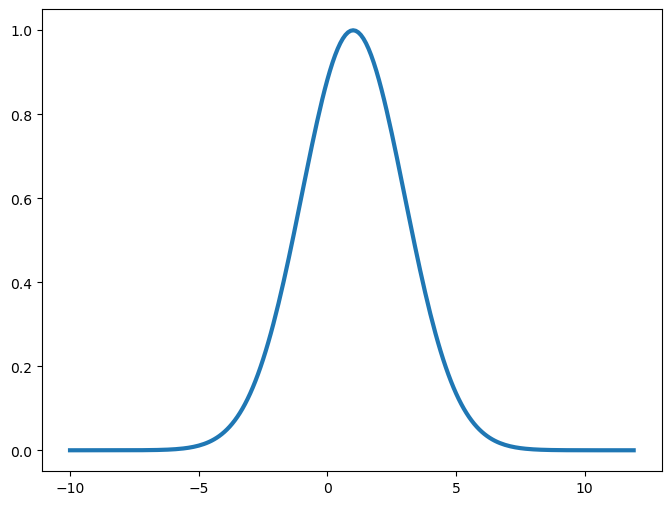

In [37]:
plot_(x, f, args)

## *3.2w Numerical integration*

In [38]:
from scipy.integrate import quad as integral

a = -10; b = 12;
I, err = integral(f, a, b, args)

print(f'An estimate of the absolute error in the result: {err}')
I

An estimate of the absolute error in the result: 1.658173531815521e-08


5.013256358862905

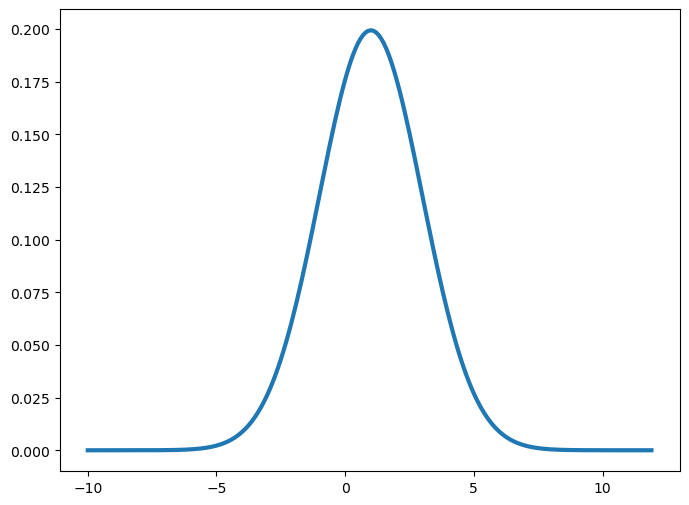

In [39]:
plot_(x, f, args, I)